In [1]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visualization
sns.set(style="whitegrid")


In [2]:
# Load the dataset (replace 'dataset.csv' with your file path)
df = pd.read_csv('Customer.csv')

# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,NaN


In [5]:
# Get the shape of the dataset
print("Dataset Shape:", df.shape)

# Get basic information about the dataset
df.info()


Dataset Shape: (7043, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [7]:
# Display summary statistics for numerical columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Unnamed: 21,Unnamed: 22
count,7043.000000,7043.000000,7043.000000,7032.000000,0.0,0.0
mean,0.162147,32.371149,64.761692,2283.300441,NaN,NaN
std,0.368612,24.559481,30.090047,2266.771362,NaN,NaN
min,0.000000,0.000000,18.250000,18.800000,NaN,NaN
25%,0.000000,9.000000,35.500000,401.450000,NaN,NaN
50%,0.000000,29.000000,70.350000,1397.475000,NaN,NaN
75%,0.000000,55.000000,89.850000,3794.737500,NaN,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN,NaN


Missing Values:
 customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
Unnamed: 21         7043
Unnamed: 22         7043
dtype: int64


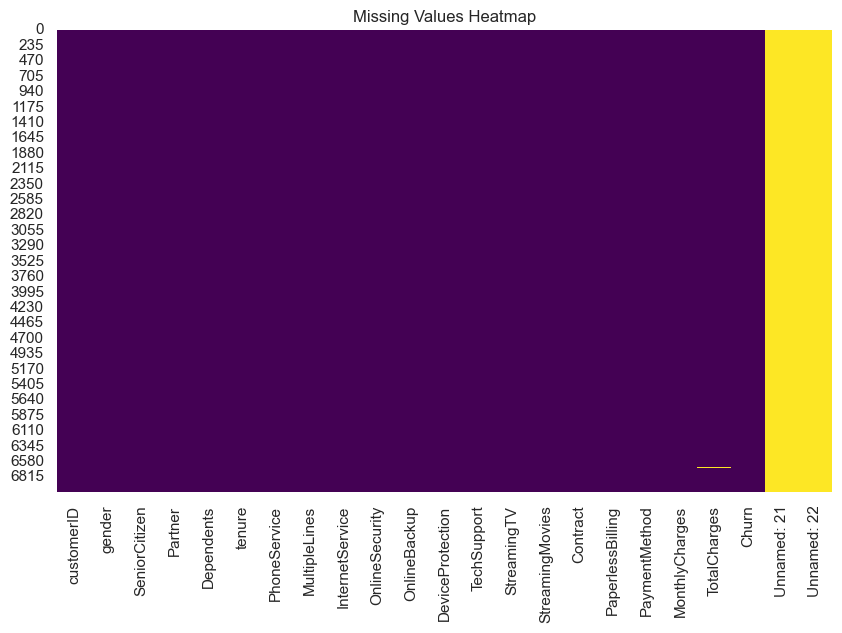

In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [11]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges with the column's mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [13]:
# Fill missing values in categorical columns with the mode
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod', 'Churn']:
    df[col] = df[col].fillna(df[col].mode()[0])  # Direct reassignment


In [15]:
# One-hot encoding for categorical variables with multiple categories
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# Label encoding for binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})  # Adjust mappings as necessary


In [19]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [21]:
# Save the preprocessed dataset
df.to_csv('preprocessed_dataset.csv', index=False)
print("Preprocessed dataset saved successfully!")


Preprocessed dataset saved successfully!


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']              # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5634, 26)
Testing set shape: (1409, 26)


In [27]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['customerID'], dtype='object')


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

print("Categorical variables encoded!")


Categorical variables encoded!


In [31]:
# Apply One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Categorical variables one-hot encoded!")


Categorical variables one-hot encoded!


In [33]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if any remain
df = df.fillna(df.mean())


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
                  ..
customerID_7038    0
customerID_7039    0
customerID_7040    0
customerID_7041    0
customerID_7042    0
Length: 7068, dtype: int64


In [35]:
# Drop the 'customerID' column if it exists
df = df.drop(columns=['customerID'], errors='ignore')  # The 'errors' parameter avoids an error if the column is not found

# Verify that the column has been removed
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection',
       ...
       'customerID_7033', 'customerID_7034', 'customerID_7035',
       'customerID_7036', 'customerID_7037', 'customerID_7038',
       'customerID_7039', 'customerID_7040', 'customerID_7041',
       'customerID_7042'],
      dtype='object', length=7068)


In [35]:
# Check for missing values
print(df.isnull().sum())

# Separate features and target variable
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

# Encode 'Churn' if it's categorical
y = y.map({'Yes': 1, 'No': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify no missing values in X and y
print(X_train.isnull().sum())
print(y_train.isnull().sum())


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
                  ..
customerID_7038    0
customerID_7039    0
customerID_7040    0
customerID_7041    0
customerID_7042    0
Length: 7068, dtype: int64
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
                  ..
customerID_7038    0
customerID_7039    0
customerID_7040    0
customerID_7041    0
customerID_7042    0
Length: 7067, dtype: int64
5634


In [39]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the shape of the encoded DataFrame
print(df_encoded.shape)


(7043, 7068)


In [41]:
# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)  # Drop the target variable from the features
y = df_encoded['Churn']  # Churn is the target variable


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5634, 7067) (1409, 7067) (5634,) (1409,)


In [45]:
# Check for any remaining NaN values in the dataset
print(X.isnull().sum())


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
                  ..
customerID_7038    0
customerID_7039    0
customerID_7040    0
customerID_7041    0
customerID_7042    0
Length: 7067, dtype: int64


In [47]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to fill missing values with the mean (for numerical columns)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to X (features)
X_imputed = imputer.fit_transform(X)

# Check if NaNs are removed after imputation
print(pd.DataFrame(X_imputed).isnull().sum())


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 21' 'Unnamed: 22']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


0       0
1       0
2       0
3       0
4       0
       ..
7060    0
7061    0
7062    0
7063    0
7064    0
Length: 7065, dtype: int64


In [49]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model with the imputed data
model.fit(X_imputed, y)

print("Model training complete!")


Model training complete!


In [51]:
# Check for missing values in the test dataset
print(X_test.isnull().sum())


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
                  ..
customerID_7038    0
customerID_7039    0
customerID_7040    0
customerID_7041    0
customerID_7042    0
Length: 7067, dtype: int64


In [53]:
# Impute missing values in X_test
X_test_imputed = imputer.transform(X_test)

# Check again for missing values in X_test after imputation
print(pd.DataFrame(X_test_imputed).isnull().sum())


0       0
1       0
2       0
3       0
4       0
       ..
7060    0
7061    0
7062    0
7063    0
7064    0
Length: 7065, dtype: int64


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 21' 'Unnamed: 22']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [55]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1036
           1       0.85      0.72      0.78       373

    accuracy                           0.89      1409
   macro avg       0.88      0.84      0.86      1409
weighted avg       0.89      0.89      0.89      1409


Confusion Matrix:
[[990  46]
 [104 269]]


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming y_test is the true labels and y_pred is the model's predicted labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Classification Report (which includes Precision, Recall, F1 Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.89
Precision: 0.85
Recall: 0.72
F1 Score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1036
           1       0.85      0.72      0.78       373

    accuracy                           0.89      1409
   macro avg       0.88      0.84      0.86      1409
weighted avg       0.89      0.89      0.89      1409


Confusion Matrix:
[[990  46]
 [104 269]]


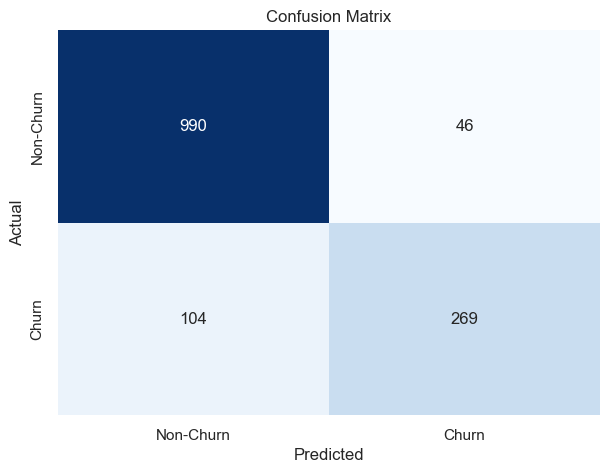

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


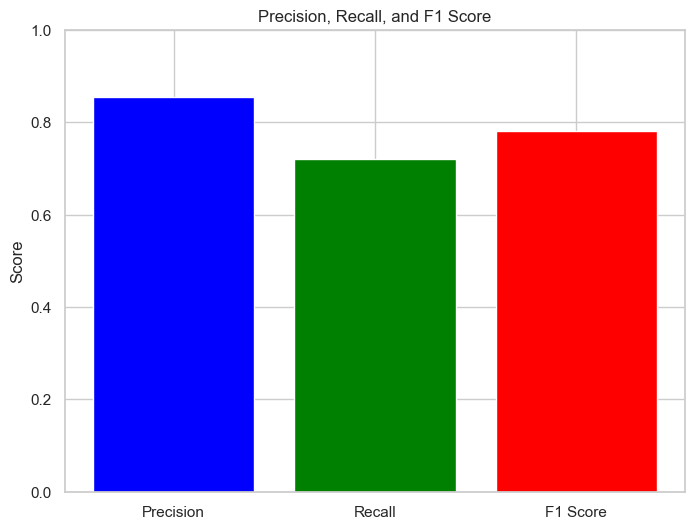

In [59]:
# Import required libraries
import numpy as np

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar plot for Precision, Recall, F1 Score
metrics = [precision, recall, f1]
metrics_name = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metrics_name, metrics, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.show()


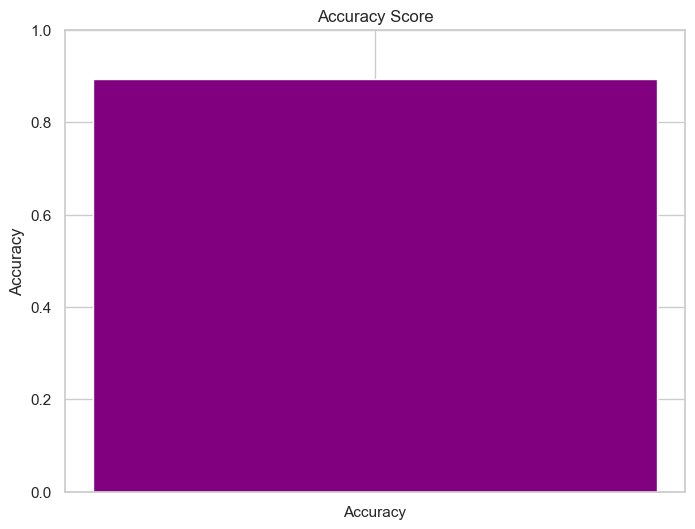

In [71]:
# Plotting the accuracy score
plt.figure(figsize=(8, 6))
plt.bar(['Accuracy'], [accuracy], color='purple')
plt.ylim(0, 1)
plt.title('Accuracy Score')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Impute missing values for X_train and X_test (if any)
imputer = SimpleImputer(strategy='mean')  # You can use 'most_frequent' for categorical data

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for Logistic Regression
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, verbose=1)

# Step 4: Fit the model with the imputed data
grid_search.fit(X_train_imputed, y_train)

# Step 5: Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Step 6: Predict with the best model
y_pred_best = grid_search.best_estimator_.predict(X_test_imputed)

# Step 7: Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after hyperparameter tuning: {accuracy_best:.2f}")

print("Classification Report for Tuned Model:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix for Tuned Model:")
print(confusion_matrix(y_test, y_pred_best))


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 21' 'Unnamed: 22']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unnamed: 21' 'Unnamed: 22']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
